# Data Analysis

In [12]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from io import StringIO # read data from string
import numpy as np # linear algebra (correlation calculation)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
import matplotlib.dates as mdates # data visualization


## 1. Data Loading

In [17]:
# kompletter Event-Datensatz als CSV-Datei einlesen

PREFIX_TO_DELETE = ";;;;Shifts;"
FILE = "data/Events-Match_Test__TEAM_A_vs__TEAM_B-Period_Period_1_Period_Period_2_Period_Period_3.csv"

def read_file(file_name: str) -> pd.DataFrame:
    """
    Create a dataframe from a "Events export"-file downloaded from kinexon. 
    
    For best results, select all periods and only the metrics "Timestamp in local format" and "Shifts".
    
    :param file_name: path to the file
    :return: pandas dataframe
    """

    with open(file_name, "r", encoding="utf-8") as f:
        # read first line
        columns = f.readline()
        
        # get rid of weird starting characters and remove new line
        columns = columns[3:].strip()
        
        # find "Shifts"-descriptor    
        shift_columns = None
        while True:
            next_line = f.readline()
    
            # all event-descriptors start with ;;;;. If it does not start with this, then its data
            if not next_line.startswith(";;;;"):
                break
            
            # we find Shifts-descriptor or 
            if "Shifts" in next_line:
                shift_columns = next_line
    
        if not shift_columns:
            raise ValueError("CSV does not have a descriptor for Shifts")   
        
        # delete delete prefix and descriptor
        shift_columns = shift_columns[len(PREFIX_TO_DELETE)-1:]
        
        # concat columns
        columns += shift_columns
        
        # read all rows
        file_str = columns
        while next_line:
            print(next_line)
            file_str += next_line
            next_line = f.readline()
        
        # replace comma separated first columns with semicolon
        file_str = file_str.replace(", ", ";")
    
        # save data to df    
        df = pd.read_csv(StringIO(file_str), sep=";", index_col=False)

        # filter event 'Shifts'
        df = df[df["Event type"] == "Shift"]
        
        return df
    
df_shifts = read_file(FILE)
print(df_shifts.head(10))    

1670697995000;"12/10/2022, 07:46:35.000 PM";438;"D TEST";Shift;34.707001;114;29;15;25;36;9;0;;337.08;22.6;21.67;37.45

1670697995000;"12/10/2022, 07:46:35.000 PM";443;"D TEST";Shift;43.952999;177;25;21;39;51;36;4;;413.47;24.34;28.74;39.24

1670697995000;"12/10/2022, 07:46:35.000 PM";470;"D3 Guest";Acceleration;1.608;3.42;12.33;2.45;1.86;10.76;Low

1670697995000;"12/10/2022, 07:46:35.000 PM";470;"D3 Guest";"Change of Pace";1.174;2.55;12.27;2.45;

1670697995000;"12/10/2022, 07:46:35.000 PM";470;"D3 Guest";Shift;82.765999;288;45;83;70;87;3;0;;0;21.88;51.74;37.51

1670697995000;"12/10/2022, 07:46:35.000 PM";471;"D4 Guest";Acceleration;1.692;5.3;18.71;4.03;2.8;17.07;Medium

1670697995000;"12/10/2022, 07:46:35.000 PM";471;"D4 Guest";"Change of Pace";1.421;4.14;18.49;4.03;

1670697995000;"12/10/2022, 07:46:35.000 PM";471;"D4 Guest";Shift;57.615002;215;34;29;59;79;14;0;;0;21.75;46.27;48.18

1670697995000;"12/10/2022, 07:46:35.000 PM";449;"FW TEST";Acceleration;1.581;4.56;15.98;2.86;2.12;12.09;

In [16]:
df_shifts.head(100)

,"imestamp (ms)""",Timestamp in local format,Player ID,Name,Event type,Duration (s),Distance,Distance (speed | Very low),Distance (speed | Low),Distance (speed | Medium),Distance (speed | High),Distance (speed | Very high),Distance (speed | Sprint),Distance (speed | 0 - 0 km/h),Metabolic Power (Ø),Speed (max.),Skating Load,Skating Intensity
0,1670697995000,12/10/2022;07:46:35.000 PM,438,D TEST,Shift,34.707001,114.0,29.0,15,25,36,9,0.0,NaN,337.08,22.60,21.67,37.45
1,1670697995000,12/10/2022;07:46:35.000 PM,443,D TEST,Shift,43.952999,177.0,25.0,21,39,51,36,4.0,NaN,413.47,24.34,28.74,39.24
4,1670697995000,12/10/2022;07:46:35.000 PM,470,D3 Guest,Shift,82.765999,288.0,45.0,83,70,87,3,0.0,NaN,0.00,21.88,51.74,37.51
7,1670697995000,12/10/2022;07:46:35.000 PM,471,D4 Guest,Shift,57.615002,215.0,34.0,29,59,79,14,0.0,NaN,0.00,21.75,46.27,48.18
11,1670697995000,12/10/2022;07:46:35.000 PM,448,FW TEST,Shift,20.010000,1.0,1.0,0,0,0,0,0.0,NaN,9.93,4.64,0.49,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1670698458000,12/10/2022;07:54:18.000 PM,446,FW TEST,Shift,56.028000,203.0,37.0,32,25,51,31,26.0,NaN,411.35,28.49,49.49,53.00
1896,1670698458000,12/10/2022;07:54:18.000 PM,451,FW TEST,Shift,66.169998,236.0,36.0,31,49,77,43,0.0,NaN,301.12,23.52,45.95,41.66
1899,1670698458000,12/10/2022;07:54:18.000 PM,482,FW5 Guest,Shift,52.992001,234.0,26.0,44,36,16,12,99.0,NaN,0.00,31.28,35.80,40.53
1900,1670698458000,12/10/2022;07:54:18.000 PM,483,FW6 Guest,Shift,50.853001,193.0,42.0,7,19,36,27,62.0,NaN,0.00,28.75,34.10,40.24


### 1.1 Vergleich mit csv 'SHIFTS_ONLY_Events-Match...'

In [7]:
# Laden des 'Shifts only' DataFrame direkt aus der entsprechenden CSV-Datei
df_shifts_only = pd.read_csv('data/SHIFTS_ONLY_Events-Match_Test__TEAM_A_vs__TEAM_B-Period_Period_1_Period_Period_2_Period_Period_3.csv', sep=';')

# Sicherstellen, dass keine zusätzlichen Leerzeichen in den Spaltennamen sind
df_shifts.columns = df_shifts.columns.str.strip()
df_shifts_only.columns = df_shifts_only.columns.str.strip()

In [8]:
# Funktion, um die Anzahl der 0-Werte in einer Spalte zu zählen
def count_zeros(df, column_name):
    return (df[column_name] == 0).sum()

# Namen der Spalten
metabolic_power_column = 'Metabolic Power (Ø)'
skating_load_column = 'Skating Load'
skating_intensity_column = 'Skating Intensity'

# Zählen der 0-Werte in den Spalten für df_shifts
zeros_metabolic_power_shifts = count_zeros(df_shifts, metabolic_power_column)
zeros_skating_load_shifts = count_zeros(df_shifts, skating_load_column)
zeros_skating_intensity_shifts = count_zeros(df_shifts, skating_intensity_column)

# Zählen der 0-Werte in den Spalten für df_shifts_only
zeros_metabolic_power_shifts_only = count_zeros(df_shifts_only, metabolic_power_column)
zeros_skating_load_shifts_only = count_zeros(df_shifts_only, skating_load_column)
zeros_skating_intensity_shifts_only = count_zeros(df_shifts_only, skating_intensity_column)

# Ausgabe der Anzahl der 0-Werte für df_shifts
print(f"df_shifts - Anzahl der 0-Werte in {metabolic_power_column}: {zeros_metabolic_power_shifts}")
print(f"df_shifts - Anzahl der 0-Werte in {skating_load_column}: {zeros_skating_load_shifts}")
print(f"df_shifts - Anzahl der 0-Werte in {skating_intensity_column}: {zeros_skating_intensity_shifts}")

# Ausgabe der Anzahl der 0-Werte für df_shifts_only
print(f"df_shifts_only - Anzahl der 0-Werte in {metabolic_power_column}: {zeros_metabolic_power_shifts_only}")
print(f"df_shifts_only - Anzahl der 0-Werte in {skating_load_column}: {zeros_skating_load_shifts_only}")
print(f"df_shifts_only - Anzahl der 0-Werte in {skating_intensity_column}: {zeros_skating_intensity_shifts_only}")


df_shifts - Anzahl der 0-Werte in Metabolic Power (Ø): 257
df_shifts - Anzahl der 0-Werte in Skating Load: 10
df_shifts - Anzahl der 0-Werte in Skating Intensity: 10
df_shifts_only - Anzahl der 0-Werte in Metabolic Power (Ø): 257
df_shifts_only - Anzahl der 0-Werte in Skating Load: 10
df_shifts_only - Anzahl der 0-Werte in Skating Intensity: 10


Amount of zero values in the respected columns are identical

In [9]:
# Vergleich der Shapes beider DataFrames
print(f"Shape von df_shifts: {df_shifts.shape}")
print(f"Shape von df_shifts_only: {df_shifts_only.shape}")

# Erstellen einer leeren Liste, um die Ergebnisse zu speichern
comparison_results = []

# Liste der zu vergleichenden Spalten
columns_to_compare = ['Duration (s)', 'Distance', 'Metabolic Power (Ø)', 'Skating Intensity', 'Skating Load']

# Füge Shape-Informationen hinzu
comparison_results.append({
    'Attribute': 'Shape',
    'df_shifts': str(df_shifts.shape),
    'df_shifts_only': str(df_shifts_only.shape),
    'Difference': '' if df_shifts.shape == df_shifts_only.shape else 'Different'
})

# Berechnung und Hinzufügen der Durchschnittswerte für jede Spalte
for column in columns_to_compare:
    mean_df_shifts = df_shifts[column].mean()
    mean_df_shifts_only = df_shifts_only[column].mean()
    comparison_results.append({
        'Attribute': f'Mean of {column}',
        'df_shifts': mean_df_shifts,
        'df_shifts_only': mean_df_shifts_only,
        'Difference': mean_df_shifts - mean_df_shifts_only
    })

# Berechnung und Hinzufügen der 0-Werte für jede Spalte
for column in columns_to_compare:
    zeros_df_shifts = (df_shifts[column] == 0).sum()
    zeros_df_shifts_only = (df_shifts_only[column] == 0).sum()
    comparison_results.append({
        'Attribute': f'Zero count of {column}',
        'df_shifts': zeros_df_shifts,
        'df_shifts_only': zeros_df_shifts_only,
        'Difference': zeros_df_shifts - zeros_df_shifts_only
    })

# Erstellen eines DataFrames aus den gesammelten Ergebnissen
comparison_df = pd.DataFrame(comparison_results)

# Ausgabe des vergleichenden DataFrames
print(comparison_df)


Shape von df_shifts: (711, 18)
Shape von df_shifts_only: (711, 18)
                            Attribute   df_shifts df_shifts_only Difference
0                               Shape   (711, 18)      (711, 18)           
1                Mean of Duration (s)   58.023219      58.023219        0.0
2                    Mean of Distance  159.468354     159.468354        0.0
3         Mean of Metabolic Power (Ø)  239.714736     239.714736        0.0
4           Mean of Skating Intensity   32.399747      32.399747        0.0
5                Mean of Skating Load    28.22685       28.22685        0.0
6          Zero count of Duration (s)           0              0          0
7              Zero count of Distance           3              3          0
8   Zero count of Metabolic Power (Ø)         257            257          0
9     Zero count of Skating Intensity          10             10          0
10         Zero count of Skating Load          10             10          0


Based on the identical shapes and matching average and zero count values for key metrics, we can conclude that `df_shifts` and `df_shifts_only` contain the same data.


## 2. Data Cleaning / Data Enrichment

In [10]:
# Zählen der 0-Werte in den Spalten für df_shifts
zeros_metabolic_power_shifts = count_zeros(df_shifts, metabolic_power_column)
zeros_skating_load_shifts = count_zeros(df_shifts, skating_load_column)
zeros_skating_intensity_shifts = count_zeros(df_shifts, skating_intensity_column)

# Ausgabe der Anzahl der 0-Werte für df_shifts
print(f"df_shifts - Anzahl der 0-Werte in {metabolic_power_column}: {zeros_metabolic_power_shifts}")
print(f"df_shifts - Anzahl der 0-Werte in {skating_load_column}: {zeros_skating_load_shifts}")
print(f"df_shifts - Anzahl der 0-Werte in {skating_intensity_column}: {zeros_skating_intensity_shifts}")


df_shifts - Anzahl der 0-Werte in Metabolic Power (Ø): 257
df_shifts - Anzahl der 0-Werte in Skating Load: 10
df_shifts - Anzahl der 0-Werte in Skating Intensity: 10


In [24]:
# MIT JOEL NOCH ANSCHAUEN

# rename column 'imestamp (ms)"' to 'Timestamp (ms)'
df_shifts.rename(columns={'imestamp (ms)"': 'Timestamp (ms)'}, inplace=True)


In [28]:
# Stellen Sie sicher, dass 'Timestamp (ms)' als Zahl formatiert ist
df_shifts['Timestamp (ms)'] = pd.to_numeric(df_shifts['Timestamp (ms)'], errors='coerce')

# Konvertierung der 'Metabolic Power (Ø)' in einen numerischen Typ, um Berechnungen zu ermöglichen
df_shifts['Metabolic Power (Ã˜)'] = pd.to_numeric(df_shifts['Metabolic Power (Ø)'], errors='coerce')

# Sortieren der Daten nach 'Player ID' und 'Timestamp (ms)'
df_shifts = df_shifts.sort_values(by=['Player ID', 'Timestamp (ms)'])

# Berechnung der Zeitdifferenz zwischen aufeinanderfolgenden Events für jeden Spieler
df_shifts['Time diff'] = df_shifts.groupby('Player ID')['Timestamp (ms)'].diff()

# Festlegen eines Schwellenwerts für die Definition einer Pause (z.B. 30 Sekunden in Millisekunden)
threshold = 30000

# Markierung des Beginns eines neuen Shifts
df_shifts['New Shift'] = (df_shifts['Time diff'] > threshold) | df_shifts['Time diff'].isnull()

# Zuweisung einer Shift-Nummer für jeden Spieler
df_shifts['Shift Number'] = df_shifts.groupby('Player ID')['New Shift'].cumsum()

# Berechnung der Startzeit jedes Shifts
df_shifts['Shift Start'] = df_shifts.groupby(['Player ID', 'Shift Number'])['Timestamp (ms)'].transform('first')

# Berechnung der Endzeit jedes Shifts
df_shifts['Shift End'] = df_shifts.groupby(['Player ID', 'Shift Number'])['Timestamp (ms)'].transform('last')

# Verschieben der 'Shift End' Zeit zur Berechnung der Pause bis zum Beginn des nächsten Shifts
df_shifts['Next Shift Start'] = df_shifts.groupby('Player ID')['Shift Start'].shift(-1)

# Berechnung der Pause zwischen den Shifts
df_shifts['Pause Duration'] = df_shifts['Next Shift Start'] - df_shifts['Shift End']

# Berechnung des durchschnittlichen Werts der Metabolic Power (Ø) für jeden Shift
df_shifts['Avg Metabolic Power'] = df_shifts.groupby(['Player ID', 'Shift Number'])['Metabolic Power (Ø)'].transform('mean')

# Erstellen eines neuen DataFrames mit den relevanten Informationen für die Visualisierung
df_shifts_relevant = df_shifts[['Player ID', 'Shift Number', 'Shift Start', 'Shift End' ,'Next Shift Start', 'Pause Duration', 'Avg Metabolic Power']].drop_duplicates(subset=['Player ID', 'Shift Number'])

print(df_shifts_relevant.head(100))

      Player ID  Shift Number    Shift Start      Shift End  Next Shift Start  \
0           438             1  1670697995000  1670697995000      1.670698e+12   
566         438             2  1670698120000  1670698120000      1.670698e+12   
1301        438             3  1670698291000  1670698291000      1.670699e+12   
2632        438             4  1670698705000  1670698705000      1.670699e+12   
3109        438             5  1670698825000  1670698825000      1.670699e+12   
...         ...           ...            ...            ...               ...   
6024        443            12  1670701159000  1670701159000      1.670701e+12   
6358        443            13  1670701336000  1670701336000      1.670701e+12   
6826        443            14  1670701481000  1670701481000      1.670702e+12   
7429        443            15  1670701698000  1670701698000      1.670702e+12   
8252        443            16  1670702064000  1670702064000      1.670702e+12   

      Pause Duration  Avg M

## 3. Correlation Analysis

Ziel dieser Analyse ist es, die Beziehungen zwischen verschiedenen Leistungsvariablen von Athleten zu verstehen. Insbesondere interessieren uns die Korrelationen zwischen Metabolic Power und Skating Load, Metabolic Power und Skating Intensity, sowie zwischen Skating Load und Skating Intensity. Zusätzlich untersuchen wir die Anzahl der 0-Werte in der Metabolic Power, um ihre Eignung als Belastungsvariable zu bewerten. Diese Analyse hilft uns zu entscheiden, welche Variable am besten als Indikator für die Belastung verwendet werden kann.


In [29]:
# Filtern des DataFrames, um nur Zeilen zu behalten, die in allen drei Variablen keine 0-Werte haben
df_filtered = df_shifts[(df_shifts['Metabolic Power (Ø)'] != 0) & (df_shifts['Skating Load'] != 0) & (df_shifts['Skating Intensity'] != 0)]

# Erneutes Zählen der 0-Werte nach dem Filtern, um sicherzustellen, dass die Filterung erfolgreich war
num_zeros_metabolic_power_filtered = (df_filtered['Metabolic Power (Ø)'] == 0).sum()
num_zeros_skating_load_filtered = (df_filtered['Skating Load'] == 0).sum()
num_zeros_skating_intensity_filtered = (df_filtered['Skating Intensity'] == 0).sum()

print(f"Anzahl der 0-Werte in Metabolic Power nach Filterung: {num_zeros_metabolic_power_filtered}")
print(f"Anzahl der 0-Werte in Skating Load nach Filterung: {num_zeros_skating_load_filtered}")
print(f"Anzahl der 0-Werte in Skating Intensity nach Filterung: {num_zeros_skating_intensity_filtered}")

# Erstellen der Korrelationsmatrix für den gefilterten DataFrame
correlation_matrix_filtered = df_filtered[['Metabolic Power (Ø)', 'Skating Load', 'Skating Intensity']].corr()

# Korrelationsmatrix anzeigen
print(correlation_matrix_filtered)


Anzahl der 0-Werte in Metabolic Power nach Filterung: 0
Anzahl der 0-Werte in Skating Load nach Filterung: 0
Anzahl der 0-Werte in Skating Intensity nach Filterung: 0
                     Metabolic Power (Ø)  Skating Load  Skating Intensity
Metabolic Power (Ø)             1.000000     -0.316120           0.104817
Skating Load                   -0.316120      1.000000           0.209794
Skating Intensity               0.104817      0.209794           1.000000


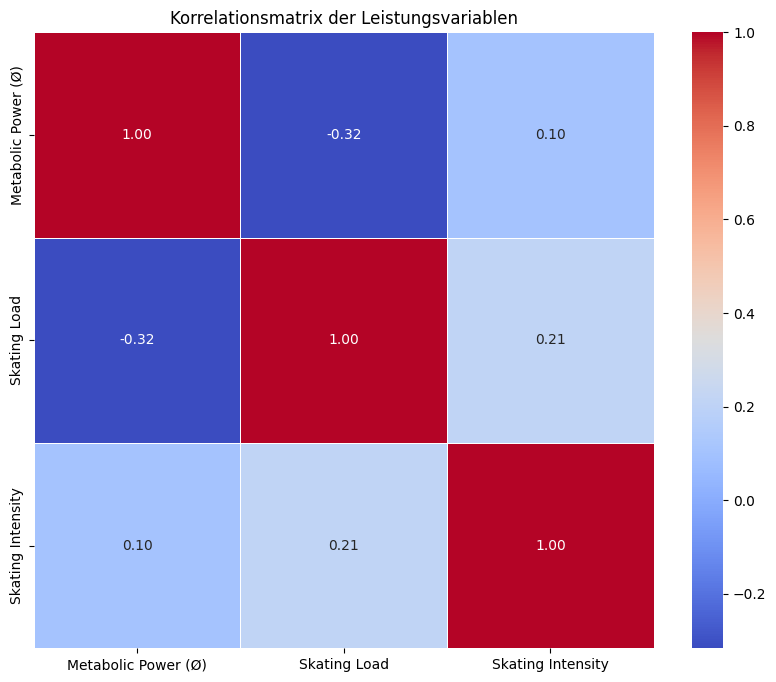

In [30]:
# Berechnung der Korrelationsmatrix
correlation_matrix = df_filtered[['Metabolic Power (Ø)', 'Skating Load', 'Skating Intensity']].corr()

# Heatmap für die Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix der Leistungsvariablen')
plt.show()


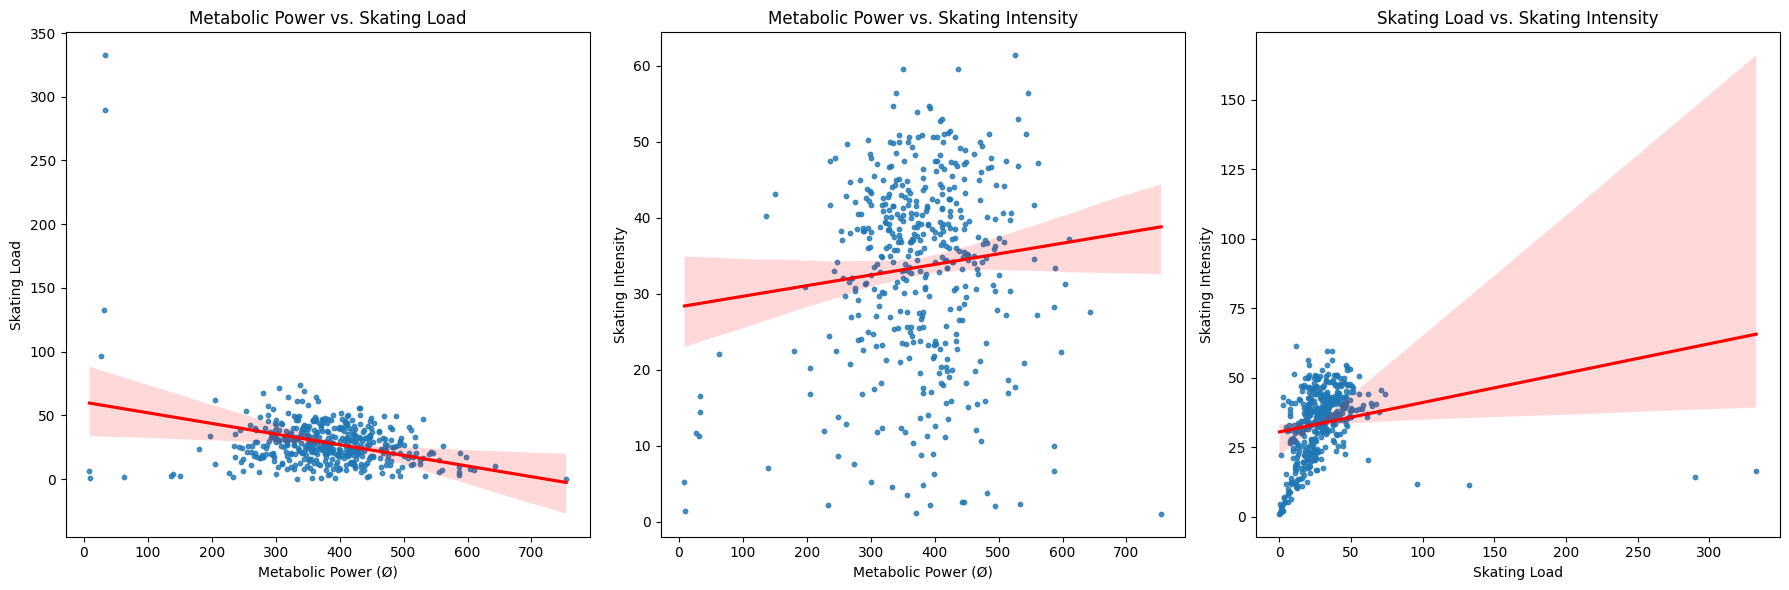

In [31]:
# Erstellen eines 1x3 Subplot-Layouts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Metabolic Power vs. Skating Load mit Regressionslinie
sns.regplot(ax=axes[0], x='Metabolic Power (Ø)', y='Skating Load', data=df_filtered, scatter_kws={'s': 10}, line_kws={"color": "red"})
axes[0].set_title('Metabolic Power vs. Skating Load')
axes[0].set_xlabel('Metabolic Power (Ø)')
axes[0].set_ylabel('Skating Load')

# Metabolic Power vs. Skating Intensity mit Regressionslinie
sns.regplot(ax=axes[1], x='Metabolic Power (Ø)', y='Skating Intensity', data=df_filtered, scatter_kws={'s': 10}, line_kws={"color": "red"})
axes[1].set_title('Metabolic Power vs. Skating Intensity')
axes[1].set_xlabel('Metabolic Power (Ø)')
axes[1].set_ylabel('Skating Intensity')

# Skating Load vs. Skating Intensity mit Regressionslinie
sns.regplot(ax=axes[2], x='Skating Load', y='Skating Intensity', data=df_filtered, scatter_kws={'s': 10}, line_kws={"color": "red"})
axes[2].set_title('Skating Load vs. Skating Intensity')
axes[2].set_xlabel('Skating Load')
axes[2].set_ylabel('Skating Intensity')

plt.tight_layout()  # Verbessert die Darstellung, indem Überlappungen vermieden werden
plt.show()


Anhand der durchgeführten Korrelationsanalyse sehen wir, dass:

- `Metabolic Power (Ø)` hat eine negative Korrelation mit der `Skating Load` (-0,316) und eine geringe positive Korrelation mit der `Skating Intensity` (0,105).
- Die `Skating Load` und die `Skating Intensity` haben eine positive Korrelation (0,210), die allerdings nicht sehr stark ist.

In Anbetracht dieser Ergebnisse wird die Entscheidung, die Variable `Skating Intensity` für die weitere Analyse heranzuziehen, durch die folgenden Punkte unterstützt:

1. **Relevanz für den Sport** Die Skating-Intensität, die sich aus der auf die Zeit normierten Skating-Belastung ableitet, ist ein direkteres Maß für die Intensität der Anstrengung in einer Sportart wie Eishockey, bei der die Spieler im Schichtbetrieb arbeiten. Sie berücksichtigt die Dauer der Aktivität, die für das Verständnis der tatsächlichen Intensität auf dem Eis entscheidend ist.

2. **Geringere Anzahl von Null-Werten** Die Anzahl der Nullwerte bei der Eislaufintensität ist im Vergleich zur metabolischen Leistung deutlich geringer. Dies deutet darauf hin, dass die Eislaufintensität ein konsistenteres Maß für die Aktivität darstellt, ohne dass eine umfangreiche Datenbereinigung oder die Behandlung von Nicht-Aktivitätsperioden erforderlich ist.

3. **Praktischer Nutzen für Trainer und Ausbilder** Die Skating-Intensität ist eine unkomplizierte Messgröße, die von Trainern und Ausbildern leicht verstanden und angewendet werden kann, um Trainings- oder Spielstrategien zu ändern. Sie vereinfacht den Entscheidungsprozess bei der Bewertung der Leistung und Kondition der Spieler.

4. **Spiegelt die Dynamik des Spiels besser wider** Die Skating-Intensität erfasst wahrscheinlich eher die für Eishockey charakteristischen Aktivitätsstöße, die schnelle Geschwindigkeits- und Richtungswechsel beinhalten, als die gleichmäßige Aktivität, die durch die metabolische Leistung impliziert wird.

## 4. Shift Analyse

### 4.1 Auf Spielerebene

Als erster Schritt der Analyse soll das Muster und die Intensität der Shiftaktivität jedes einzelnen Spielers über eine Spielzeit zusammenfassend visualisiert werden. Dazu werden folgende Attribute der Eventdaten benutzt:

- `Timestamp`
- `Skating Intensity`

Ziel dieses Schrittes ist, das Engagement und die Leistung der Spieler vergleichen, sowie die Planung von Trainings- und Erholungsphasen unterstützen zu können.

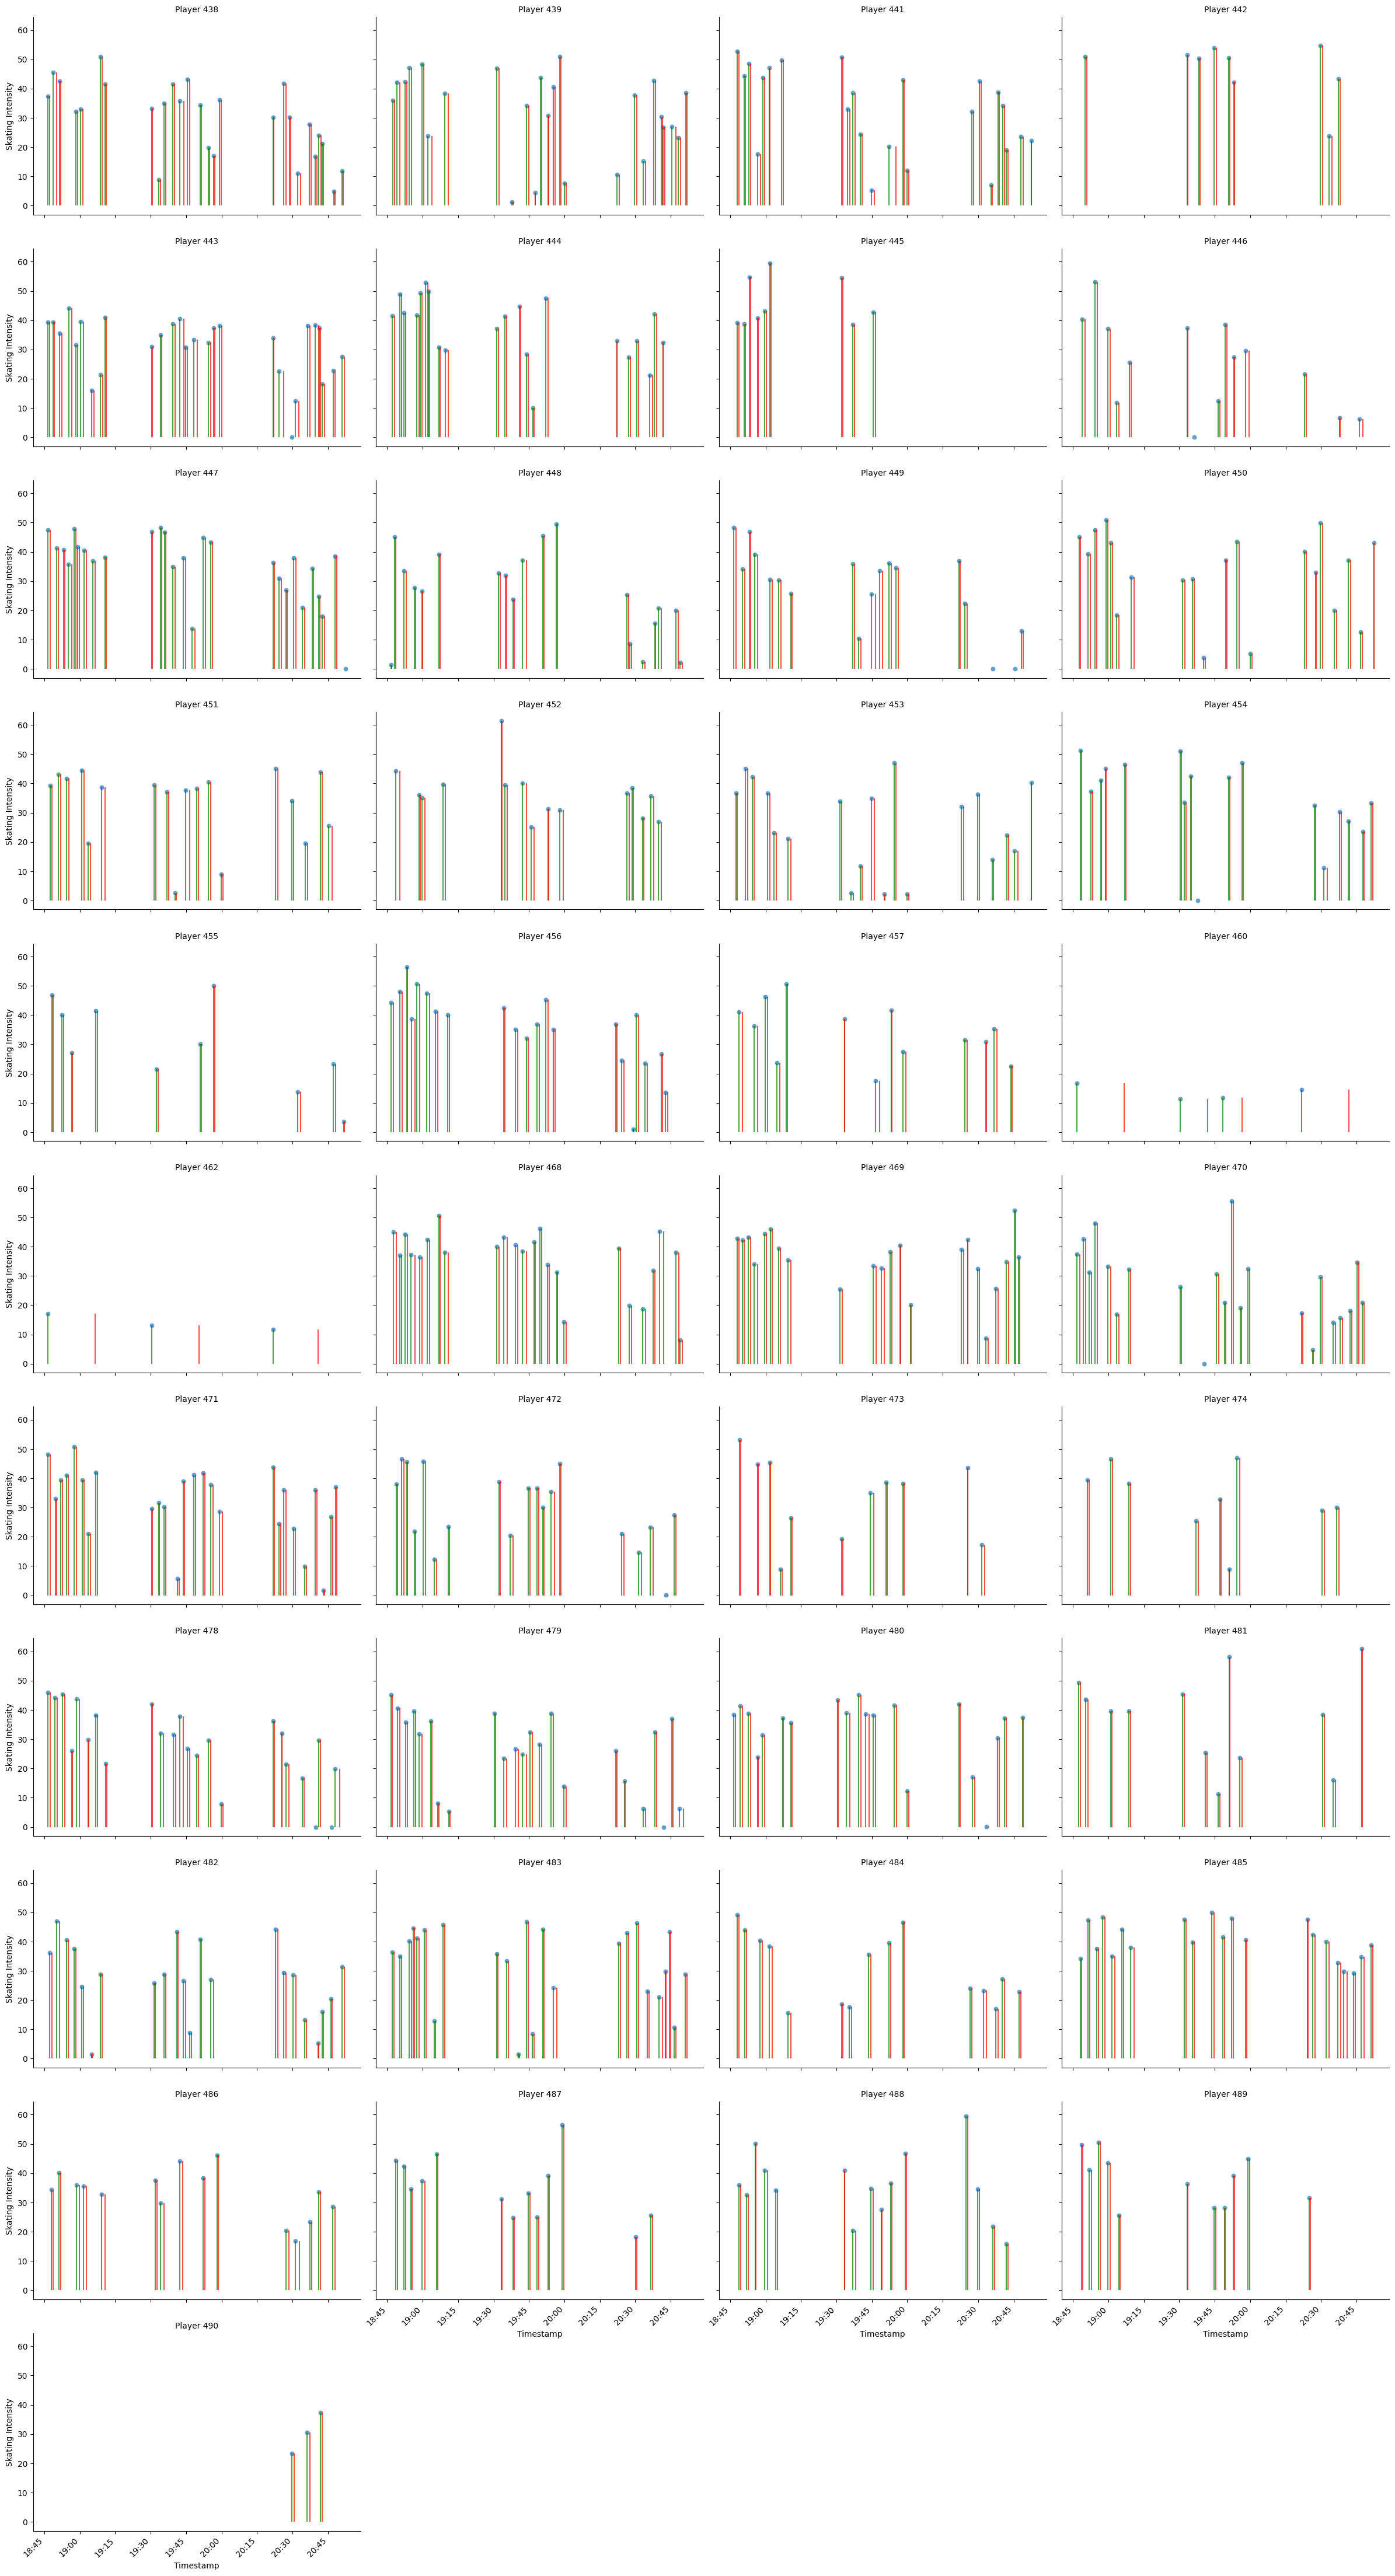

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#import matplotlib.dates as mdates

# Annahme, dass df Ihr DataFrame ist und bereits initialisiert wurde

# Konvertieren von 'Timestamp (ms)' in lesbare Zeit, wenn nicht bereits geschehen
df_shifts['Readable Timestamp'] = pd.to_datetime(df_shifts['Timestamp (ms)'], unit='ms')

# Erstellen des FacetGrids
g = sns.FacetGrid(df_shifts, col="Player ID", col_wrap=4, height=4, aspect=1.5)

# Funktion zum Zeichnen der vertikalen Linien von den Punkten aus nach unten
def draw_duration_lines(data, **kwargs):
    ax = plt.gca()  # Holt den aktuellen Axes-Subplot
    # Zeichnen der vertikalen Linien
    for _, row in data.iterrows():
        # ax.vlines kann verwendet werden, um vertikale Linien bei x mit ymind und ymax zu zeichnen
        ax.vlines(x=row['Readable Timestamp'], ymin=0, ymax=row['Skating Intensity'], color='green', linestyle='-', alpha=0.7)
        end_time = row['Readable Timestamp'] + pd.to_timedelta(row['Duration (s)'], unit='s')
        ax.vlines(x=end_time, ymin=0, ymax=row['Skating Intensity'], color='red', linestyle='-', alpha=0.7)

# Hinzufügen der vertikalen Linien für die Dauer
g.map_dataframe(draw_duration_lines)

# Hinzufügen der Scatterplots für die Timestamps
g.map_dataframe(sns.scatterplot, 'Readable Timestamp', 'Skating Intensity', alpha=0.7)

# Anpassen der Achsenbeschriftungen und Titel
g.set_axis_labels('Timestamp', 'Skating Intensity')
g.set_titles('Player {col_name}')

# Formatieren der X-Achse für Zeitdaten
for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    # Drehen und ausrichten der Datumslables für bessere Lesbarkeit
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


**Interpretation**
- Jeder blaue Punkt stellt den Durchschnittswert der `Skating Intensity` für einen bestimmten Shift des Spielers dar.
- Grüne Linien markieren den Beginn und rote Linien das Ende eines Shifts.
- Die Höhe der Punkte und Linien repräsentiert die Intensität der Aktivität gemessen an der `Skating Intensity` während der Zeit auf dem Eis.
- Die Dichte und Verteilung dieser Punkte und Linien über die Zeit kann genutzt werden, um die Belastung und das Engagement der Spieler während des Spiels zu analysieren.

Diese Visualisierung kann Trainern dabei helfen, Entscheidungen über die Verteilung der Spielzeit, die Belastungssteuerung im Training und die Erholungsstrategien zu treffen. Ein abnehmender Trend in der `Skating Intensity` über die Zeit könnte auf Ermüdung hindeuten und möglicherweise Verbesserungspotenzial in der körperlichen Konditionierung aufzeigen. Umgekehrt könnte ein konstant hohes Niveau der `Skating Intensity` darauf hinweisen, dass der Spieler in der Lage ist, über die gesamte Spielzeit ein hohes Engagement aufrechtzuerhalten. Diese Informationen sind wertvoll, um individuelle Trainingspläne anzupassen und die Leistungsfähigkeit der Spieler zu optimieren.

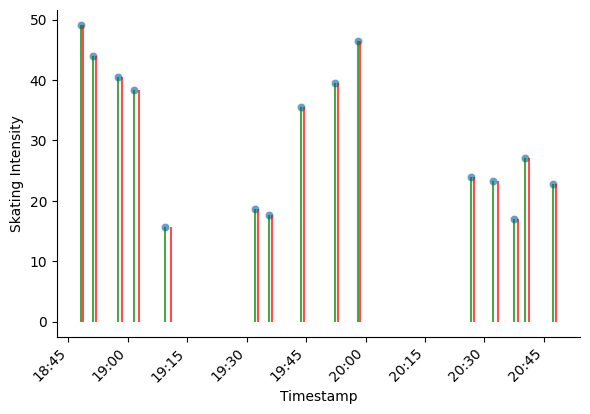

In [39]:
## Funktion zum Erstellen eines Plots für einen bestimmten Spieler

# Konvertieren von 'Timestamp (ms)' in lesbare Zeit
df_shifts['Readable Timestamp'] = pd.to_datetime(df_shifts['Timestamp (ms)'], unit='ms')

# Funktion, um den Plot für einen bestimmten Spieler zu erstellen
def plot_player_shifts(player_id):
    # Filtern des DataFrames auf den gewählten Spieler
    df_player = df_shifts[df_shifts['Player ID'] == player_id]

    # Erstellen des FacetGrids nur für den gewählten Spieler
    g = sns.FacetGrid(df_player, height=4, aspect=1.5)

    # Funktion zum Zeichnen der vertikalen Linien von den Punkten aus nach unten
    def draw_duration_lines(data, **kwargs):
        ax = plt.gca()  # Holt den aktuellen Axes-Subplot
        # Zeichnen der vertikalen Linien
        for _, row in data.iterrows():
            ax.vlines(x=row['Readable Timestamp'], ymin=0, ymax=row['Skating Intensity'], color='green', linestyle='-', alpha=0.7)
            end_time = row['Readable Timestamp'] + pd.to_timedelta(row['Duration (s)'], unit='s')
            ax.vlines(x=end_time, ymin=0, ymax=row['Skating Intensity'], color='red', linestyle='-', alpha=0.7)

    # Hinzufügen der vertikalen Linien für die Dauer
    g.map_dataframe(draw_duration_lines)

    # Hinzufügen der Scatterplots für die Timestamps
    g.map_dataframe(sns.scatterplot, 'Readable Timestamp', 'Skating Intensity', alpha=0.7)

    # Anpassen der Achsenbeschriftungen und Titel
    g.set_axis_labels('Timestamp', 'Skating Intensity')
    g.set_titles(f'Player {player_id}')

    # Formatieren der X-Achse für Zeitdaten
    for ax in g.axes.flatten():
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())

        # Drehen und ausrichten der Datumslables für bessere Lesbarkeit
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    plt.show()

# Aufruf der Funktion mit der Spieler-ID, z.B. 484
plot_player_shifts(484)


**Mögliche Interpretation zu Spieler 484**

- **Shift-Dauer** Die Abstände zwischen den grünen und roten Linien variieren, was auf unterschiedliche Shift-Längen schließen lässt. Es könnte untersucht werden, ob es einen Zusammenhang zwischen der Länge der Shifts und der Intensität gibt.
- **Erholungszeit** Die Pausen zwischen den Shifts (die Lücken zwischen den roten und der nächsten grünen Linie) scheinen relativ gleichmäßig verteilt zu sein, was auf ein systematisches Rotationsmuster hinweist.
- **Potenzielle Ermüdung** Gegen Ende des Beobachtungszeitraums scheint die Intensität leicht abzunehmen. Dies könnte ein Indikator für Ermüdung sein und sollte weiter beobachtet werden.

### 4.2 Auf Blockebene

#### 4.2.1 Automatische Zuordnung von Spieler-IDs zu Blöcken

Um die Spieler-IDs automatisch zu Blöcken zuzuordnen, werden wir die Zeitstempel der Spieler-Shifts analysieren. Die Annahme ist, dass Spieler, die gleichzeitig auf dem Eis sind, demselben Block zugeordnet werden. Wir werden die Shift-Daten nach Zeitstempeln durchlaufen und Gruppen von Spielern identifizieren, die gleichzeitig Shifts beginnen und beenden.

In [40]:
# Erstellen eines leeren Dictionaries, um die Blöcke zu speichern
blocks = {}

# Sortieren des DataFrames nach 'Shift Start' und 'Shift End'
df_shifts_sorted = df_shifts.sort_values(['Shift Start', 'Shift End'])

# Durchlaufen der sortierten Shifts und Zuordnen zu Blöcken
current_block = []
current_end_time = 0
block_id = 1

for index, row in df_shifts_sorted.iterrows():
    # Wenn der aktuelle Shift beginnt, bevor der vorherige beendet ist, gehören sie zum selben Block
    if row['Shift Start'] <= current_end_time:
        current_block.append(row['Player ID'])
        # Aktualisieren der Endzeit des aktuellen Blocks, falls nötig
        current_end_time = max(current_end_time, row['Shift End'])
    else:
        # Wenn der aktuelle Shift nach dem Ende des aktuellen Blocks beginnt, beginnen wir einen neuen Block
        if current_block:
            blocks['Block ' + str(block_id)] = current_block
            block_id += 1
        current_block = [row['Player ID']]
        current_end_time = row['Shift End']

# Vergiss nicht, den letzten Block hinzuzufügen
if current_block:
    blocks['Block ' + str(block_id)] = current_block

# Jeder Block ist nun als Liste von Spieler-IDs gespeichert
